In [807]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [808]:
df = pd.read_csv('data/fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

In [809]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [810]:
df['value'].quantile(0.025)

np.float64(17876.4)

In [811]:
df['value'].quantile(0.975)

np.float64(177613.075)

In [812]:
(df['value']>=df['value'].quantile(0.025)).value_counts()

value
True     1271
False      33
Name: count, dtype: int64

In [813]:
(df['value']<=df['value'].quantile(0.975)).value_counts()

value
True     1271
False      33
Name: count, dtype: int64

In [814]:
df = df[(df['value']>=df['value'].quantile(0.025))&(df['value']<=df['value'].quantile(0.975))]

<Axes: title={'center': 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

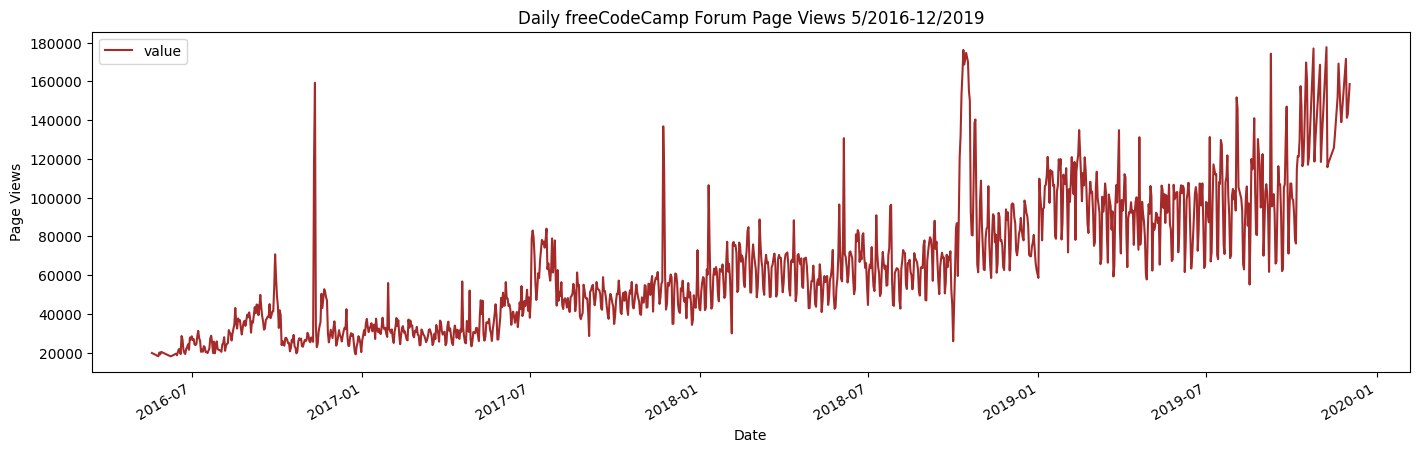

In [815]:
df.plot(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019', xlabel="Date", ylabel='Page Views', color='brown', figsize=(17, 5))

Text(0, 0.5, 'Page Views')

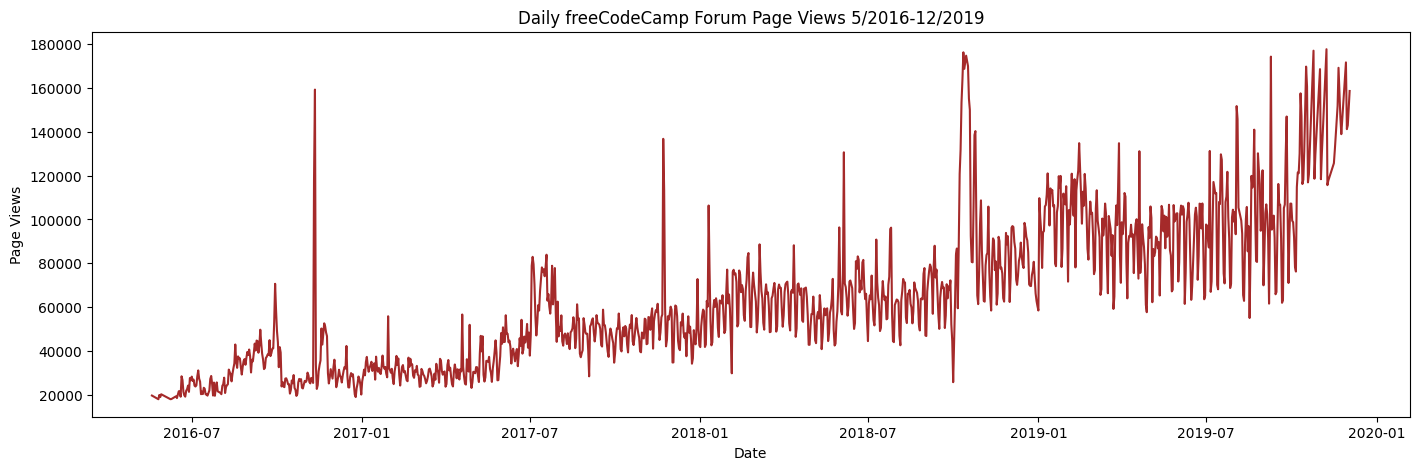

In [816]:
fig = plt.figure(figsize=(17, 5))
plt.plot(df.index, df['value'], color='brown')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel("Date")
plt.ylabel('Page Views')

In [817]:
df['Years'] = df.index.year

In [818]:
df['Months'] = df.index.month
#df['Months'] = df.index.strftime('%B')

In [819]:
df.head()

,value,Years,Months
date,,,
2016-05-19,19736,2016,5
2016-05-26,18060,2016,5
2016-05-27,19997,2016,5
2016-05-28,19044,2016,5
2016-05-29,20325,2016,5


In [820]:
df_bar = pd.pivot_table(df, values="value", index=["Years"], columns=["Months"], aggfunc=np.average)

In [821]:
df_bar.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

<Axes: xlabel='Years', ylabel='Average Page Views'>

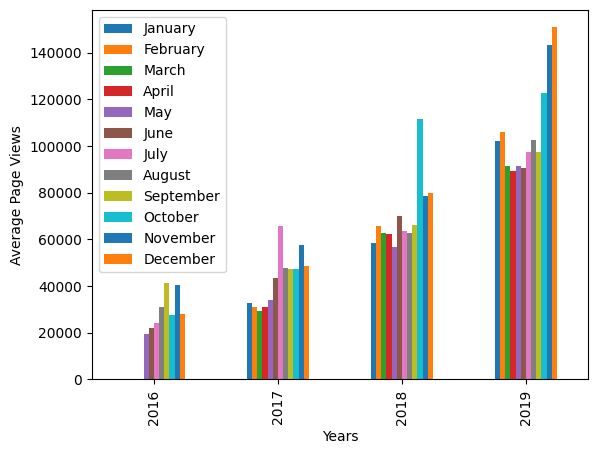

In [822]:
df_bar.plot.bar(ylabel="Average Page Views")

In [823]:
df_box = df.copy()

In [824]:
df_box.head()

,value,Years,Months
date,,,
2016-05-19,19736,2016,5
2016-05-26,18060,2016,5
2016-05-27,19997,2016,5
2016-05-28,19044,2016,5
2016-05-29,20325,2016,5


In [825]:
df_box.reset_index(inplace=True)

In [826]:
df_box.head()

,date,value,Years,Months
0,2016-05-19,19736,2016,5
1,2016-05-26,18060,2016,5
2,2016-05-27,19997,2016,5
3,2016-05-28,19044,2016,5
4,2016-05-29,20325,2016,5


In [827]:
df_box['year'] = [d.year for d in df_box.date]

In [828]:
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [829]:
df_box = df_box.sort_values(by='Months')

In [830]:
df_box.head()

,date,value,Years,Months,year,month
957,2019-01-26,78342,2019,1,2019,Jan
958,2019-01-27,86596,2019,1,2019,Jan
959,2019-01-28,111784,2019,1,2019,Jan
960,2019-01-29,107881,2019,1,2019,Jan
961,2019-01-30,106844,2019,1,2019,Jan


C:\Users\Francisco\AppData\Local\Temp\ipykernel_4744\1282808624.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='year', y='value', ax=axes[0], palette = "deep").set(title='Year-wise Box Plot (Trend)', ylabel='Page Views')
C:\Users\Francisco\AppData\Local\Temp\ipykernel_4744\1282808624.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='month', y='value', ax=axes[1], palette = "pastel").set(title='Month-wise Box Plot (Seasonality)', ylabel='Page Views')


[Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)'),
 Text(0, 0.5, 'Page Views')]

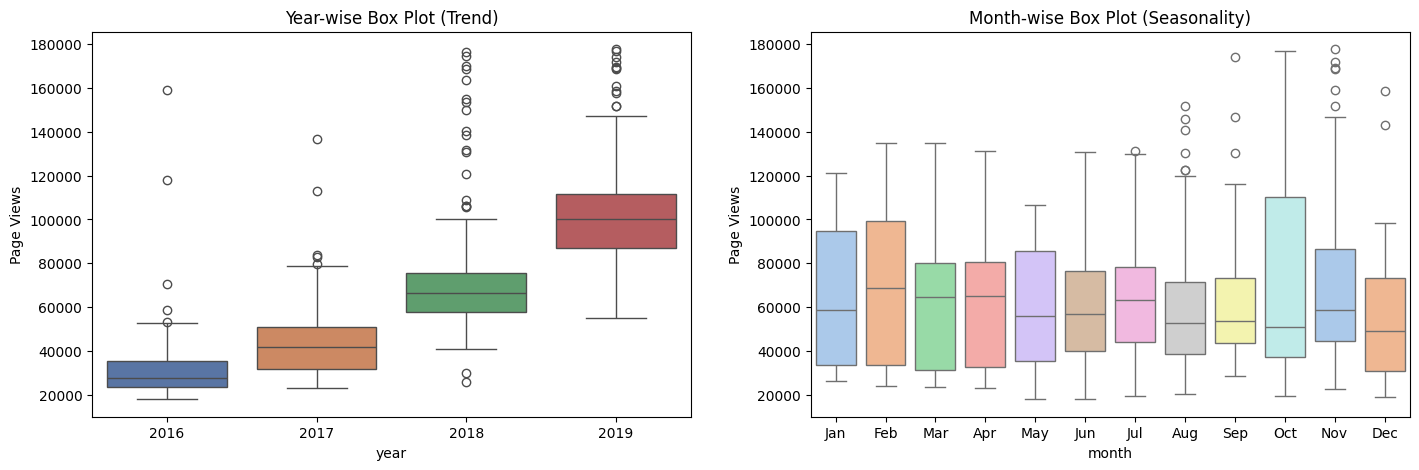

In [831]:
fig, axes = plt.subplots(1,2, figsize=(17, 5))
sns.boxplot(data=df_box, x='year', y='value', ax=axes[0], palette = "deep").set(title='Year-wise Box Plot (Trend)', ylabel='Page Views')
sns.boxplot(data=df_box, x='month', y='value', ax=axes[1], palette = "pastel").set(title='Month-wise Box Plot (Seasonality)', ylabel='Page Views')